In [1]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import math

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# <font color = blue> Step 1: Reading and Understanding the Data </font>

In [3]:
xed = pd.read_csv('Leads.csv')

In [4]:
xed.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [5]:
xed.shape

(9240, 37)

In [6]:
xed.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [7]:
xed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

<br/>

# <font color = blue> Step 2: Fixing values and datatypes </font>

*   Checking for missing values
*   Checking for skewness in categorical variables


Removing columns with very high number of missing values or heavy skewness.<br/>
Imputing values where possible.<br/>
Removing rows if very few number of missing values for a column.



In [8]:
#checking for missing values
#parallely checking for skewness in categorical columns that have high number of missing values
#will check skewness for other categorical variables as well later
xed.isna().sum()[xed.isna().sum() > 0]

Lead Source                                        36
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Tags                                             3353
Lead Quality                                     4767
Lead Profile                                     2709
City                                             1420
Asymmetrique Activity Index                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Score                       4218
dtype: int64

In [9]:
# percentage of null values in each column
xed.isna().sum()[xed.isna().sum() > 0]*100/len(xed)

Lead Source                                       0.389610
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
Lead Quality                                     51.590909
Lead Profile                                     29.318182
City                                             15.367965
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Score                       45.6493

In [10]:
#low number of missing values for 'Lead Source'- 36/9240 - 0.39% - can drop rows without impacting the results
#similarly for TotalVisits, Page Views Per Visit, Last Activity
xed = xed[~xed['Lead Source'].isna()]
xed = xed[~xed['TotalVisits'].isna()]
xed = xed[~xed['Page Views Per Visit'].isna()]
xed = xed[~xed['Last Activity'].isna()]

In [11]:
#country 
xed['Country'].value_counts()

India                   6491
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Kuwait                     4
Canada                     4
Nigeria                    4
South Africa               4
Germany                    4
Sweden                     3
Belgium                    2
Asia/Pacific Region        2
Uganda                     2
Netherlands                2
Italy                      2
Philippines                2
China                      2
Bangladesh                 2
Ghana                      2
Switzerland                1
Liberia                    1
Malaysia                   1
Kenya                      1
Indonesia                  1
Tanzania                   1
Sri Lanka     

In [12]:
#2461 missing values, and 5 rows with 'unknown', missing values maybe imputed as unknown, 
#but heavy skewness observed as well dropping the column
xed = xed.drop('Country', axis=1)

In [13]:
#specialization
xed['Specialization'].value_counts()

Select                               1851
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [14]:
#1851 'Select' - user did not select any value while filling form
#1438 missing values, both 'Select' and missing values maybe treated as 'Unknown' Specialization - imputing
xed['Specialization'].fillna('Unknown', inplace=True)
xed['Specialization'] = xed['Specialization'].apply(lambda x: 'Unknown' if (x == 'Select') else x)

In [15]:
#how did you hear
xed['How did you hear about X Education'].value_counts()

Select                   4886
Online Search             808
Word Of Mouth             347
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               66
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [16]:
#4886 values have select, 2207 missing values, effectively 7093 missing values
#too high number of missing values, dropping the column
xed = xed.drop('How did you hear about X Education', axis=1)

In [17]:
#occupation
xed['What is your current occupation'].value_counts()

Unemployed              5476
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

In [18]:
#2690 missing values, 5476 Unemployed, heavy skewness combining both, can drop the column
xed = xed.drop('What is your current occupation', axis=1)

In [19]:
#what matters in chosing course
xed['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6370
Other                           1
Flexibility & Convenience       1
Name: What matters most to you in choosing a course, dtype: int64

In [20]:
#heavy skewness, along with a good number of missing values, dropping the column
xed = xed.drop('What matters most to you in choosing a course', axis=1)

In [21]:
#city
xed['City'].value_counts()

Mumbai                         3177
Select                         2156
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

In [22]:
#heavy skewness in favor of 'Mumbai', good number of missing values, may be dropped
xed = xed.drop('City', axis=1)

In [23]:
#Tags, Lead Quality, Asymmetrique Activity Index,
#Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score
#have high number of null values, upwards of35-50%, dropping these columns
xed = xed.drop(['Tags', 'Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis=1)

In [24]:
#lead profile
xed['Lead Profile'].value_counts()

Select                         4055
Potential Lead                 1554
Other Leads                     482
Student of SomeSchool           240
Lateral Student                  21
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [25]:
#4055 rows with values as 'Select', and 2709 missing values, 
#heavy skewness for unkown (considering both selects and missing values as unkown), dropping the column
xed = xed.drop('Lead Profile', axis=1)

In [26]:
#looking at number of null values again
xed.isna().sum()[xed.isna().sum() > 0]

Series([], dtype: int64)

In [27]:
#Prospect ID, and Lead Number are of no use to analysis, dropping them
xed = xed.drop(['Prospect ID', 'Lead Number'], axis=1)

In [28]:
#looking at data types for remaining fields
xed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 23 columns):
Lead Origin                                 9074 non-null object
Lead Source                                 9074 non-null object
Do Not Email                                9074 non-null object
Do Not Call                                 9074 non-null object
Converted                                   9074 non-null int64
TotalVisits                                 9074 non-null float64
Total Time Spent on Website                 9074 non-null int64
Page Views Per Visit                        9074 non-null float64
Last Activity                               9074 non-null object
Specialization                              9074 non-null object
Search                                      9074 non-null object
Magazine                                    9074 non-null object
Newspaper Article                           9074 non-null object
X Education Forums                          9074

In [29]:
#lead origin
xed['Lead Origin'].value_counts()

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

In [30]:
#lead origin looks alright, looking at lead source now
xed['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
blog                    1
WeLearn                 1
NC_EDM                  1
welearnblog_Home        1
youtubechannel          1
testone                 1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

In [31]:
#lead source looks ok, looking at 'do not email' now
xed['Do Not Email'].value_counts()

No     8358
Yes     716
Name: Do Not Email, dtype: int64

In [32]:
#heavy skewness seen, dropping column
xed = xed.drop('Do Not Email', axis=1)

In [33]:
#do not call
xed['Do Not Call'].value_counts()

No     9072
Yes       2
Name: Do Not Call, dtype: int64

In [34]:
#heavy skewness seen, dropping column
xed = xed.drop('Do Not Call', axis=1)

In [35]:
#Last Activity
xed['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [36]:
#Specialization
xed['Specialization'].value_counts()

Unknown                              3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [37]:
#Search
xed['Search'].value_counts()

No     9060
Yes      14
Name: Search, dtype: int64

In [38]:
#heavily skewed again, dropping column
xed = xed.drop('Search', axis=1)

In [39]:
#magazine
xed['Magazine'].value_counts()

No    9074
Name: Magazine, dtype: int64

In [40]:
#value is no for all, dropping column
xed = xed.drop('Magazine', axis=1)

In [41]:
#newspaper article
xed['Newspaper Article'].value_counts()

No     9072
Yes       2
Name: Newspaper Article, dtype: int64

In [42]:
#heavy skewness again, dropping
xed = xed.drop('Newspaper Article', axis=1)

In [43]:
#forums
xed['X Education Forums'].value_counts()

No     9073
Yes       1
Name: X Education Forums, dtype: int64

In [44]:
#heavily skewed, dropping
xed = xed.drop('X Education Forums', axis=1)

In [45]:
#newspaper
xed['Newspaper'].value_counts()

No     9073
Yes       1
Name: Newspaper, dtype: int64

In [46]:
#heavy skewness, dropping
xed = xed.drop('Newspaper', axis=1)

In [47]:
#digital advertisement
xed['Digital Advertisement'].value_counts()

No     9070
Yes       4
Name: Digital Advertisement, dtype: int64

In [48]:
#heavily skewed, dropping
xed = xed.drop('Digital Advertisement', axis=1)

In [49]:
#through recommendations
xed['Through Recommendations'].value_counts()

No     9067
Yes       7
Name: Through Recommendations, dtype: int64

In [50]:
#heavy skewness, dropping
xed = xed.drop('Through Recommendations', axis=1)

In [51]:
#more updates
xed['Receive More Updates About Our Courses'].value_counts()

No    9074
Name: Receive More Updates About Our Courses, dtype: int64

In [52]:
#no for all, droppping
xed = xed.drop('Receive More Updates About Our Courses', axis=1)

In [53]:
#update on supply chain content
xed['Update me on Supply Chain Content'].value_counts()

No    9074
Name: Update me on Supply Chain Content, dtype: int64

In [54]:
#no for all, dropping
xed = xed.drop('Update me on Supply Chain Content', axis=1)

In [55]:
#dm content
xed['Get updates on DM Content'].value_counts()

No    9074
Name: Get updates on DM Content, dtype: int64

In [56]:
#no for all, dropping
xed = xed.drop('Get updates on DM Content', axis=1)

In [57]:
#pay through cheque
xed['I agree to pay the amount through cheque'].value_counts()

No    9074
Name: I agree to pay the amount through cheque, dtype: int64

In [58]:
#no for all, dropping
xed = xed.drop('I agree to pay the amount through cheque', axis=1)

In [59]:
#free copy
xed['A free copy of Mastering The Interview'].value_counts()

No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [60]:
#should be converted to binary(int)
xed['A free copy of Mastering The Interview'] = xed['A free copy of Mastering The Interview'].apply(lambda x:1 if 'Yes' else 0)

In [61]:
#last notable activity
xed['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
View in browser link Clicked       1
Email Received                     1
Form Submitted on Website          1
Resubscribed to emails             1
Approached upfront                 1
Name: Last Notable Activity, dtype: int64

In [62]:
#last notable activity looks ok, looking at remaining columns list after cleanup
xed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 10 columns):
Lead Origin                               9074 non-null object
Lead Source                               9074 non-null object
Converted                                 9074 non-null int64
TotalVisits                               9074 non-null float64
Total Time Spent on Website               9074 non-null int64
Page Views Per Visit                      9074 non-null float64
Last Activity                             9074 non-null object
Specialization                            9074 non-null object
A free copy of Mastering The Interview    9074 non-null int64
Last Notable Activity                     9074 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 779.8+ KB


In [63]:
#10 columns remaining, 1 target variable, 9 indpendents, 9047 rows of 9240 remaining
#proceeding to visualization

<br/>

# <font color = blue> Step 3: Visualizing the data </font>

In [64]:
#creating numeric categorical slices
xed_categorical = xed.select_dtypes(exclude=['float64','int64','datetime64'])
xed_numeric = xed.select_dtypes(include=['float64', 'int64']).drop('A free copy of Mastering The Interview', axis=1)
xed_binary = xed[['A free copy of Mastering The Interview']]

categorical_columns = xed_categorical.columns
numeric_columns = xed_numeric.columns
binary_columns = xed_binary.columns

In [65]:
categorical_columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'Last Notable Activity'],
      dtype='object')

In [66]:
numeric_columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')

In [67]:
binary_columns

Index(['A free copy of Mastering The Interview'], dtype='object')

### Scatter Plots

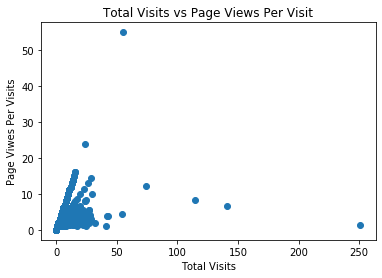

In [68]:
# total visits vs page views per visit
plt.title("Total Visits vs Page Views Per Visit")
plt.xlabel("Total Visits")
plt.ylabel("Page Viwes Per Visits")
plt.scatter(xed['TotalVisits'],xed['Page Views Per Visit'])
plt.show()

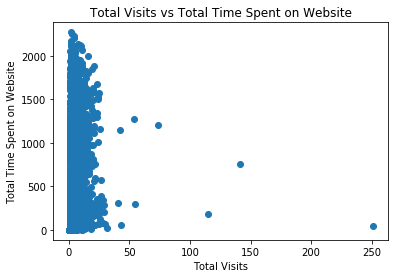

In [69]:
# total visits vs total time spent on website
plt.title("Total Visits vs Total Time Spent on Website")
plt.xlabel("Total Visits")
plt.ylabel("Total Time Spent on Website")
plt.scatter(xed['TotalVisits'], xed['Total Time Spent on Website'])
plt.show()

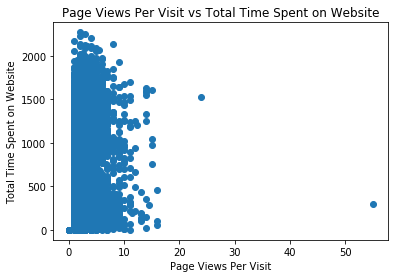

In [70]:
# page views per visit vs total time spent on website
plt.title("Page Views Per Visit vs Total Time Spent on Website")
plt.xlabel("Page Views Per Visit")
plt.ylabel("Total Time Spent on Website")
plt.scatter(xed['Page Views Per Visit'], xed['Total Time Spent on Website'])
plt.show()

### Box Plot

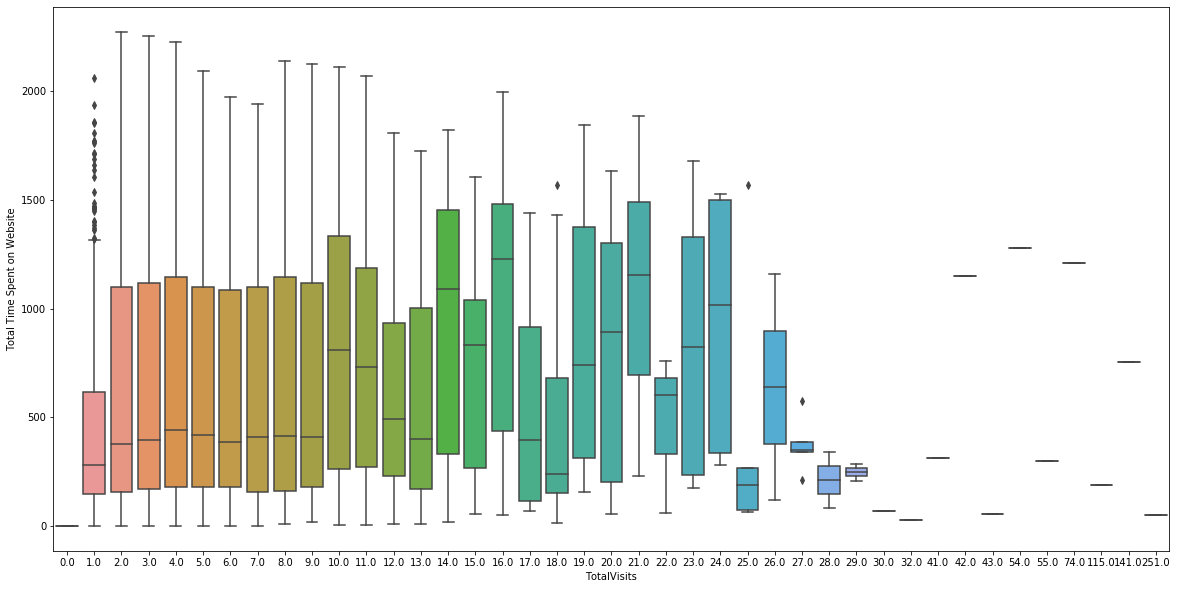

In [71]:
# Box Plot
plt.figure(figsize=[20,10])
sns.boxplot(x="TotalVisits",y="Total Time Spent on Website",data=xed)
plt.show()

### Effects of categorical variables on Conversion

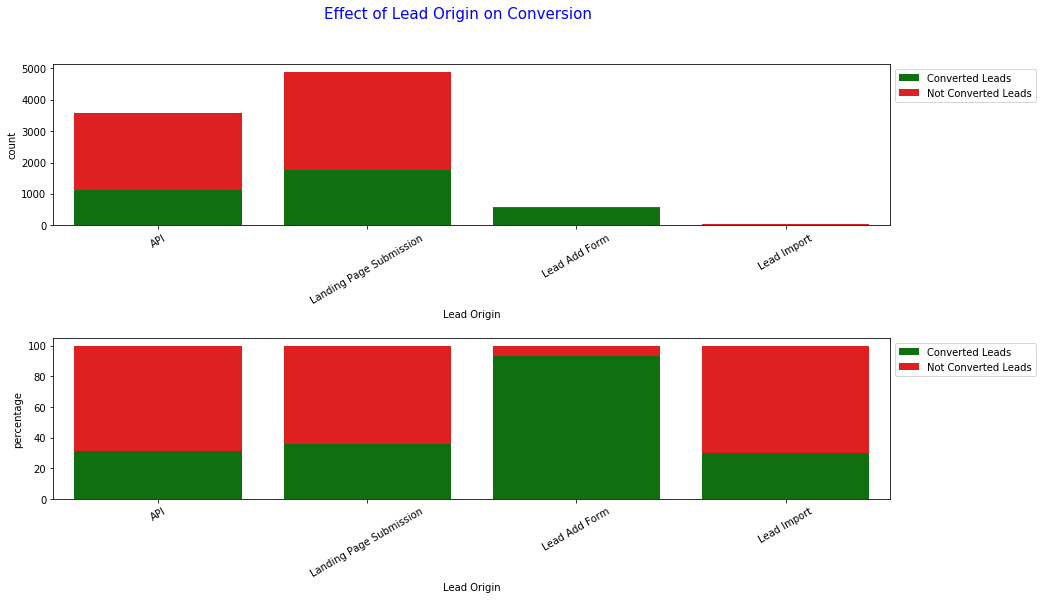

In [72]:
#visualizing impact of each categorical variable on target
#using counts and percentages of conversions in each level of categorical columns 
#lead_origin
colName = 'Lead Origin'
groupedByCatColumnAndTarget = pd.DataFrame({'count': xed.groupby([colName, 'Converted']).size().unstack(fill_value=0).stack(), 'percentage': round(xed.groupby(colName)['Converted'].value_counts(normalize=True).unstack(fill_value=0).stack()*100, 2)}).reset_index()
convertedLeads = groupedByCatColumnAndTarget[groupedByCatColumnAndTarget['Converted'] == 1]
notConvertedLeads = groupedByCatColumnAndTarget[groupedByCatColumnAndTarget['Converted'] == 0]

fig, ((ax1, ax2)) = plt.subplots(2, 1, figsize=(15,8))

sns.barplot(convertedLeads[colName], convertedLeads['count'], color="green", label="Converted Leads", ax=ax1)
sns.barplot(notConvertedLeads[colName], notConvertedLeads['count'], bottom=np.array(convertedLeads['count']), color="red", label="Not Converted Leads", ax=ax1)
sns.barplot(convertedLeads[colName], convertedLeads['percentage'], color="green", label="Converted Leads", ax=ax2)
sns.barplot(notConvertedLeads[colName], notConvertedLeads['percentage'], bottom=np.array(convertedLeads['percentage']), color="red", label="Not Converted Leads", ax=ax2)

plt.subplots_adjust(hspace=0.7)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30)

plt.suptitle("Effect of " + colName + " on Conversion", color="Blue", size=15)

ax1.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
ax2.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

plt.show()


In [73]:
#highest percentaage of conversion seen for lead origin 'Lead Add Form'

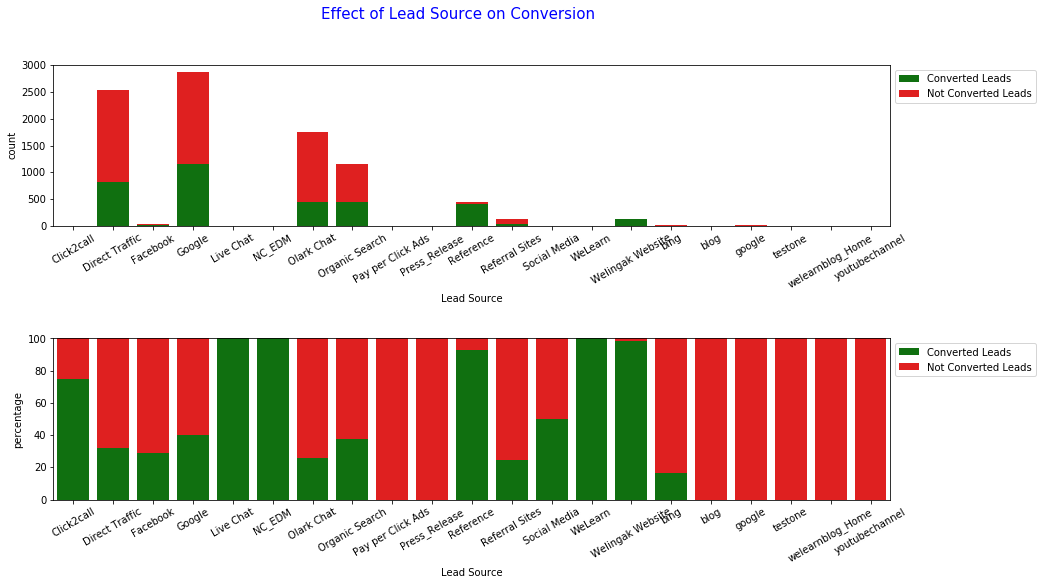

In [74]:
#lead_source
colName = 'Lead Source'
groupedByCatColumnAndTarget = pd.DataFrame({'count': xed.groupby([colName, 'Converted']).size().unstack(fill_value=0).stack(), 'percentage': round(xed.groupby(colName)['Converted'].value_counts(normalize=True).unstack(fill_value=0).stack()*100, 2)}).reset_index()
convertedLeads = groupedByCatColumnAndTarget[groupedByCatColumnAndTarget['Converted'] == 1]
notConvertedLeads = groupedByCatColumnAndTarget[groupedByCatColumnAndTarget['Converted'] == 0]

fig, ((ax1, ax2)) = plt.subplots(2, 1, figsize=(15,8))

sns.barplot(convertedLeads[colName], convertedLeads['count'], color="green", label="Converted Leads", ax=ax1)
sns.barplot(notConvertedLeads[colName], notConvertedLeads['count'], bottom=np.array(convertedLeads['count']), color="red", label="Not Converted Leads", ax=ax1)
sns.barplot(convertedLeads[colName], convertedLeads['percentage'], color="green", label="Converted Leads", ax=ax2)
sns.barplot(notConvertedLeads[colName], notConvertedLeads['percentage'], bottom=np.array(convertedLeads['percentage']), color="red", label="Not Converted Leads", ax=ax2)

plt.subplots_adjust(hspace=0.7)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30)

plt.suptitle("Effect of " + colName + " on Conversion", color="Blue", size=15)

ax1.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
ax2.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

plt.show()

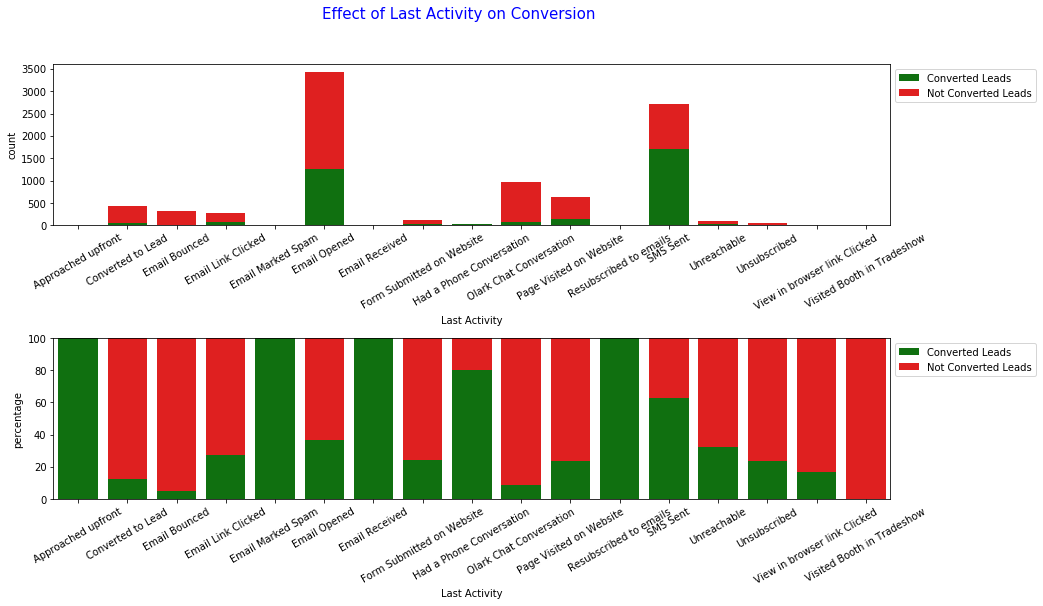

In [75]:
#last activity
colName = 'Last Activity'
groupedByCatColumnAndTarget = pd.DataFrame({'count': xed.groupby([colName, 'Converted']).size().unstack(fill_value=0).stack(), 'percentage': round(xed.groupby(colName)['Converted'].value_counts(normalize=True).unstack(fill_value=0).stack()*100, 2)}).reset_index()
convertedLeads = groupedByCatColumnAndTarget[groupedByCatColumnAndTarget['Converted'] == 1]
notConvertedLeads = groupedByCatColumnAndTarget[groupedByCatColumnAndTarget['Converted'] == 0]

fig, ((ax1, ax2)) = plt.subplots(2, 1, figsize=(15,8))

sns.barplot(convertedLeads[colName], convertedLeads['count'], color="green", label="Converted Leads", ax=ax1)
sns.barplot(notConvertedLeads[colName], notConvertedLeads['count'], bottom=np.array(convertedLeads['count']), color="red", label="Not Converted Leads", ax=ax1)
sns.barplot(convertedLeads[colName], convertedLeads['percentage'], color="green", label="Converted Leads", ax=ax2)
sns.barplot(notConvertedLeads[colName], notConvertedLeads['percentage'], bottom=np.array(convertedLeads['percentage']), color="red", label="Not Converted Leads", ax=ax2)

plt.subplots_adjust(hspace=0.7)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30)

plt.suptitle("Effect of " + colName + " on Conversion", color="Blue", size=15)

ax1.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
ax2.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

plt.show()

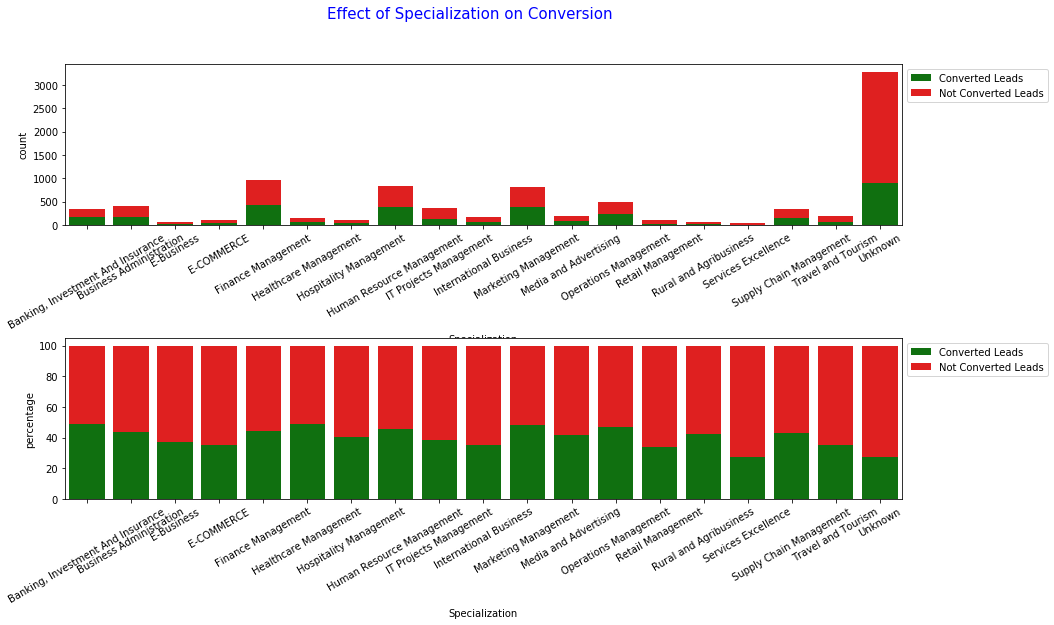

In [76]:
#specialization
colName = 'Specialization'
groupedByCatColumnAndTarget = pd.DataFrame({'count': xed.groupby([colName, 'Converted']).size().unstack(fill_value=0).stack(), 'percentage': round(xed.groupby(colName)['Converted'].value_counts(normalize=True).unstack(fill_value=0).stack()*100, 2)}).reset_index()
convertedLeads = groupedByCatColumnAndTarget[groupedByCatColumnAndTarget['Converted'] == 1]
notConvertedLeads = groupedByCatColumnAndTarget[groupedByCatColumnAndTarget['Converted'] == 0]

fig, ((ax1, ax2)) = plt.subplots(2, 1, figsize=(15,8))

sns.barplot(convertedLeads[colName], convertedLeads['count'], color="green", label="Converted Leads", ax=ax1)
sns.barplot(notConvertedLeads[colName], notConvertedLeads['count'], bottom=np.array(convertedLeads['count']), color="red", label="Not Converted Leads", ax=ax1)
sns.barplot(convertedLeads[colName], convertedLeads['percentage'], color="green", label="Converted Leads", ax=ax2)
sns.barplot(notConvertedLeads[colName], notConvertedLeads['percentage'], bottom=np.array(convertedLeads['percentage']), color="red", label="Not Converted Leads", ax=ax2)

plt.subplots_adjust(hspace=0.7)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30)

plt.suptitle("Effect of " + colName + " on Conversion", color="Blue", size=15)

ax1.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
ax2.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

plt.show()

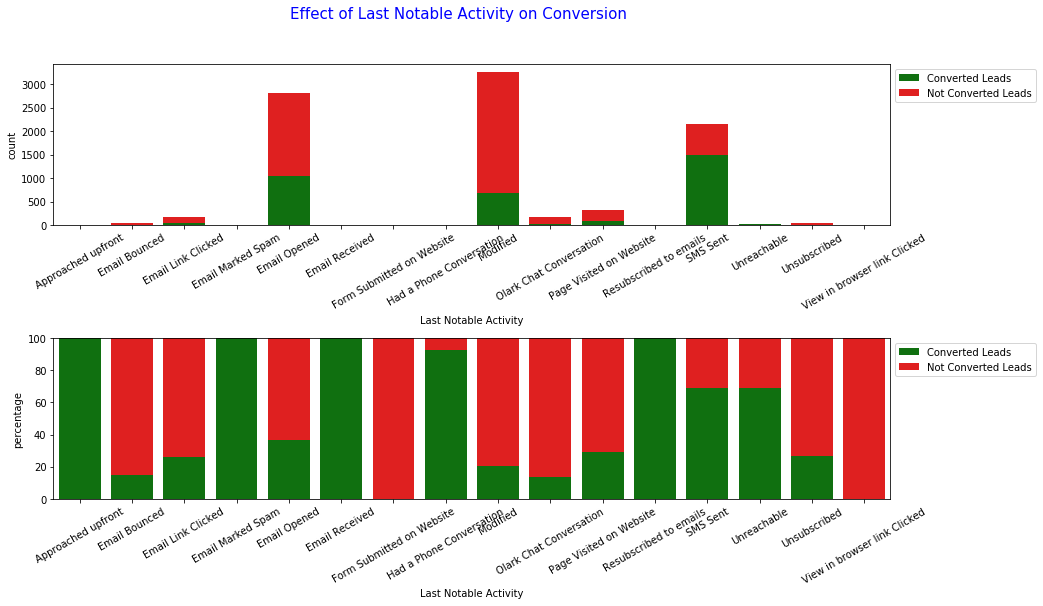

In [77]:
#last notable activity
colName = 'Last Notable Activity'
groupedByCatColumnAndTarget = pd.DataFrame({'count': xed.groupby([colName, 'Converted']).size().unstack(fill_value=0).stack(), 'percentage': round(xed.groupby(colName)['Converted'].value_counts(normalize=True).unstack(fill_value=0).stack()*100, 2)}).reset_index()
convertedLeads = groupedByCatColumnAndTarget[groupedByCatColumnAndTarget['Converted'] == 1]
notConvertedLeads = groupedByCatColumnAndTarget[groupedByCatColumnAndTarget['Converted'] == 0]

fig, ((ax1, ax2)) = plt.subplots(2, 1, figsize=(15,8))

sns.barplot(convertedLeads[colName], convertedLeads['count'], color="green", label="Converted Leads", ax=ax1)
sns.barplot(notConvertedLeads[colName], notConvertedLeads['count'], bottom=np.array(convertedLeads['count']), color="red", label="Not Converted Leads", ax=ax1)
sns.barplot(convertedLeads[colName], convertedLeads['percentage'], color="green", label="Converted Leads", ax=ax2)
sns.barplot(notConvertedLeads[colName], notConvertedLeads['percentage'], bottom=np.array(convertedLeads['percentage']), color="red", label="Not Converted Leads", ax=ax2)

plt.subplots_adjust(hspace=0.7)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30)

plt.suptitle("Effect of " + colName + " on Conversion", color="Blue", size=15)

ax1.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
ax2.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

plt.show()

### Dist plot

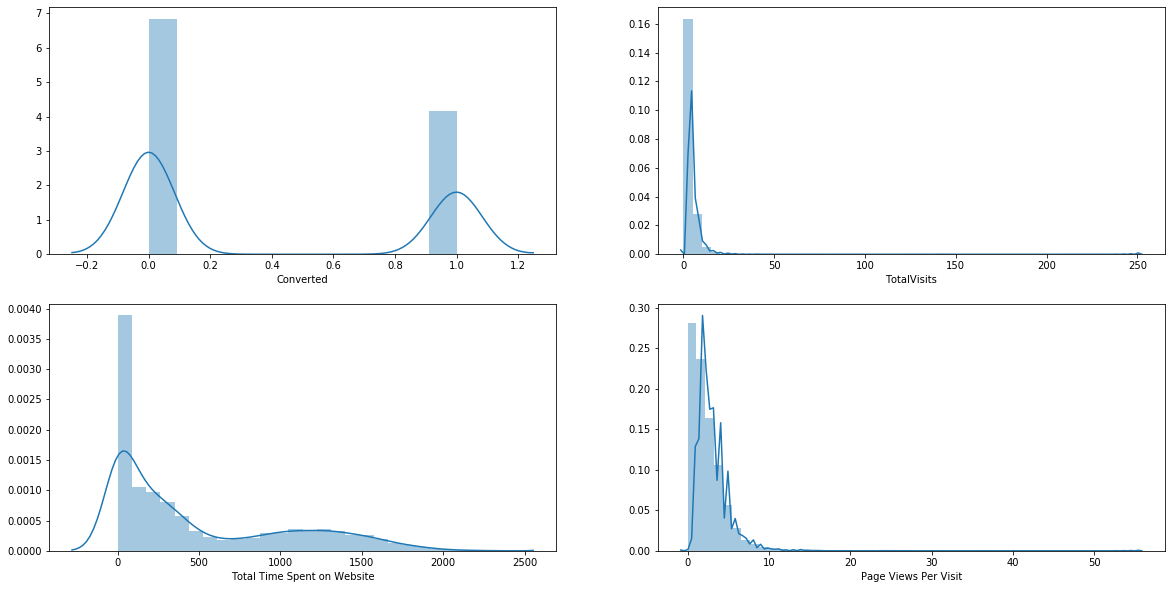

In [78]:
#looking at numeric variables
plt.figure(figsize=(20,10))
for i in range(0, len(numeric_columns)) :
    plt.subplot(2,2,i+1) 
    sns.distplot(xed[numeric_columns[i]])
plt.show()

## Pair Plot

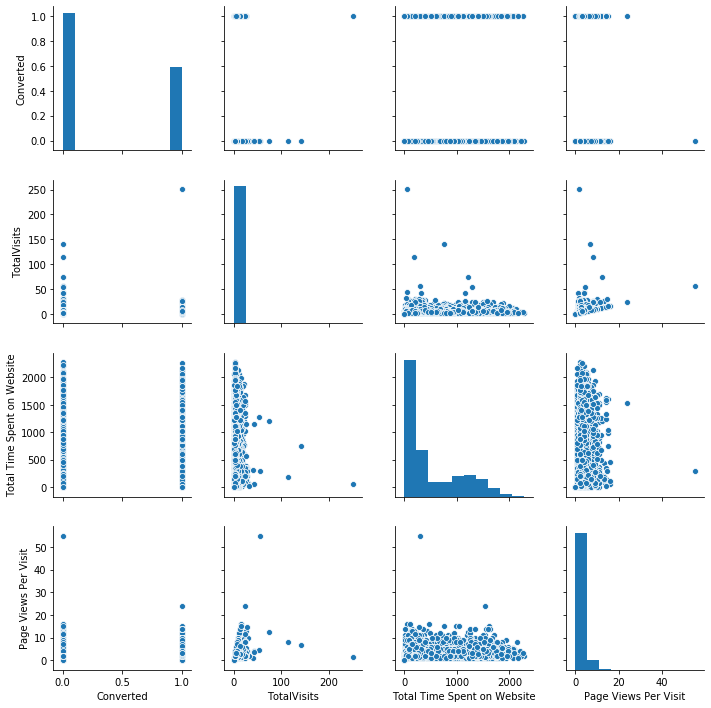

In [79]:
sns.pairplot(xed_numeric)
plt.show()

### Heat Maps
Useful to check for correlation between numeric variables

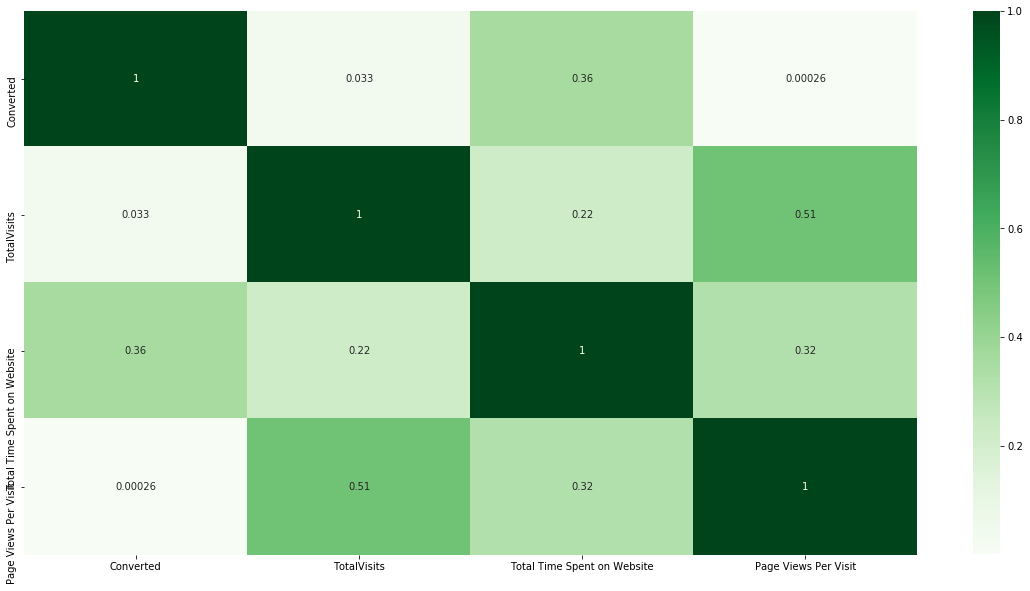

In [80]:
#plotting heatmap for numeric variables
plt.figure(figsize=(20,10))
sns.heatmap(xed_numeric.corr(), annot=True, cmap='Greens')
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show()
plt.show()

In [81]:
#moderately high correlation between total visits and page views per visit seen

<br/>

# <font color = blue> Step 4: Preparing data for modeling </font>

In [82]:
#creating dummy variables out of categorical variables
xed_dummies = pd.get_dummies(xed_categorical, drop_first=True)

In [83]:
xed = xed.drop(list(xed_categorical.columns),axis=1)
xed = pd.concat([xed, xed_dummies], axis=1)
xed.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

   A free copy of Mastering The Interview  \
0                                       1   
1                                       1   
2                                       1   
3                                       1   
4                                       1   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   ...  Last Notable Activity_Form Submitted on Website  \
0  ...                                                0   
1  ...                                                0   
2  ...                                                0   
3  ...                                                0   
4  ...                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1         

In [84]:
y = xed['Converted']
X = xed.drop('Converted', axis=1)

In [85]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [86]:
X.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   A free copy of Mastering The Interview  \
0                                       1   
1                                       1   
2                                       1   
3                                       1   
4                                       1   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  ...  Last Notable Activity_Form Submitted on Website  \
0                   0  ...                                                0   
1                   0  ...                                                0   
2                   0  ...                                                0   
3                   0  ...                                                0   
4                   1  ...                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed 

### Train Test Split

In [87]:
#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Scaling the data

In [88]:
#scaling
scaler = MinMaxScaler()
cols_to_scale = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'A free copy of Mastering The Interview']
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])

In [89]:
X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
5509     0.035857                     0.611796              0.081818   
7746     0.023904                     0.078345              0.054545   
8263     0.007968                     0.062060              0.036364   
4559     0.015936                     0.384683              0.072727   
7959     0.023904                     0.334947              0.054545   

      A free copy of Mastering The Interview  \
5509                                     0.0   
7746                                     0.0   
8263                                     0.0   
4559                                     0.0   
7959                                     0.0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
5509                                    1                          0   
7746                                    0                          0   
8263                                    1                          0   
4559                                    1                          0   
7959                                    1                          0   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  \
5509                        0                           1   
7746                        0                           0   
8263                        0                           1   
4559                        0                           0   
7959                        0                           0   

      Lead Source_Facebook  Lead Source_Google  ...  \
5509                     0                   0  ...   
7746                     0                   0  ...   
8263                     0                   0  ...   
4559                     0                   1  ...   
7959                     0                   1  ...   

      Last Notable Activity_Form Submitted on Website  \
5509                                                0   
7746                                                0   
8263                                                0   
4559                                                0   
7959                                                0   

      Last Notable Activity_Had a Phone Conversation  \
5509                                               0   
7746                                               0   
8263                                               0   
4559                                               0   
7959                                               0   

      Last Notable Activity_Modified  \
5509                               0   
7746                               0   
8263                               1   
4559                               0   
7959                               0   

      Last Notable Activity_Olark Chat Conversation  \
5509                                              0   
7746                                              0   
8263                                              0   
4559                                              0   
7959                                              0   

      Last Notable Activity_Page Visited on Website  \
5509                                              0   
7746                                              0   
8263                                              0   
4559                                              0   
7959                                              0   

      Last Notable Activity_Resubscribed to emails  \
5509                                             0   
7746                                             0   
8263                                             0   
4559                                             0   
7959                                             0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
5509                               1                                  0   
7746                               0                                  0   
8263                

In [90]:
X_train.describe()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
count  7259.000000                  7259.000000           7259.000000   
mean      0.013780                     0.214757              0.042975   
std       0.019851                     0.240043              0.039137   
min       0.000000                     0.000000              0.000000   
25%       0.003984                     0.005282              0.018182   
50%       0.011952                     0.111356              0.036364   
75%       0.019920                     0.411752              0.054545   
max       1.000000                     1.000000              1.000000   

       A free copy of Mastering The Interview  \
count                                  7259.0   
mean                                      0.0   
std                                       0.0   
min                                       0.0   
25%                                       0.0   
50%                                       0.0   
75%                                       0.0   
max                                       0.0   

       Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
count                          7259.000000                7259.000000   
mean                              0.538091                   0.065574   
std                               0.498581                   0.247553   
min                               0.000000                   0.000000   
25%                               0.000000                   0.000000   
50%                               1.000000                   0.000000   
75%                               1.000000                   0.000000   
max                               1.000000                   1.000000   

       Lead Origin_Lead Import  Lead Source_Direct Traffic  \
count              7259.000000                 7259.000000   
mean                  0.003168                    0.279515   
std                   0.056204                    0.448792   
min                   0.000000                    0.000000   
25%                   0.000000                    0.000000   
50%                   0.000000                    0.000000   
75%                   0.000000                    1.000000   
max                   1.000000                    1.000000   

       Lead Source_Facebook  Lead Source_Google  ...  \
count           7259.000000         7259.000000  ...   
mean               0.003306            0.318363  ...   
std                0.057409            0.465873  ...   
min                0.000000            0.000000  ...   
25%                0.000000            0.000000  ...   
50%                0.000000            0.000000  ...   
75%                0.000000            1.000000  ...   
max                1.000000            1.000000  ...   

       Last Notable Activity_Form Submitted on Website  \
count                                           7259.0   
mean                                               0.0   
std                                                0.0   
min                                                0.0   
25%                                                0.0   
50%                                                0.0   
75%                                                0.0   
max                                                0.0   

       Last Notable Activity_Had a Phone Conversation  \
count                                     7259.000000   
mean                                         0.001378   
std                                          0.037093   
min                                          0.000000   
25%                                          0.000000   
50%                                          0.000000   
75%                                          0.000000   
max                                          1.000000   

       Last Notable Activity_Modified  \
count                     7259.000000   
mean                         0.360793   
std                      

<br/>

# <font color = blue> Step 5: Building the model </font>

In [91]:
# 1. use rfe to pick up top variables
# 2. use statsmodels to check p-values, 
#    also check vif values and eliminate variables iteratively to arrive at a good model

In [92]:
#feature elimination using rfe
logreg = LogisticRegression()
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [93]:
rfe.support_

array([False,  True, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False,  True, False, False, False,  True,  True,  True, False,
       False, False,  True, False])

In [94]:
cols = X_train.columns[rfe.support_]
cols

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Specialization_Unknown',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')

In [95]:
#gettiing to statsmodels 
X_train_sm = sm.add_constant(X_train[cols])
logreg = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logreg.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7243
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3243.6
Date:                Mon, 08 Feb 2021   Deviance:                       6487.2
Time:                        15:34:28   Pearson chi2:                 7.13e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             1.0655      0.116      9.171      0.000       0.838       1.293
Total Time Spent on Website                       4.0243      0.138     29.127      0.000       3.754       4.295
Lead Origin_Landing Page Submission              -1.6089      0.108    -14.832      0.000      -1.822      -1.396
Lead Origin_Lead Add Form                         0.7246      0.912      0.794      0.427      -1.063       2.513
Lead Source_Reference                             2.3646      0.936      2.527      0.012       0.531       4.198
Lead Source_Welingak Website                      4.6393      1.161      3.996      0.000       2.364       6.915
Last Activity_Email Bounced                      -2.4466      0.340     -7.193      0.000      -3.113      -1.780
Last Activity_Had a Phone Conversation            1.9746      0.704      2.807      0.005       0.596       3.353
Last Activity_Olark Chat Conversation            -0.9447      0.174     -5.415      0.000      -1.287      -0.603
Specialization_Unknown                           -1.4004      0.111    -12.561      0.000      -1.619      -1.182
Last Notable Activity_Email Link Clicked         -1.7971      0.239     -7.516      0.000      -2.266      -1.328
Last Notable Activity_Email Opened               -1.3151      0.078    -16.865      0.000      -1.468      -1.162
Last Notable Activity_Modified                   -1.8657      0.087    -21.557      0.000      -2.035      -1.696
Last Notable Activity_Olark Chat Conversation    -1.7987      0.349     -5.153      0.000      -2.483      -1.115
Last Notable Activity_Page Visited on Website    -1.7617      0.171    -10.279      0.000      -2.098      -1.426
Last Notable Activity_Unsubscribed               -1.9528      0.467     -4.186      0.000      -2.867      -1.038
=================================================================================================================
"""

In [96]:
#using vif to check for co-linearity between variables
def rank_using_vif(X):
    vif = pd.DataFrame()
    vif['var'] = X.columns
    vif['vif'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif.sort_values(by = "vif", ascending = False)
    return vif

In [97]:
rank_using_vif(X_train_sm)

var        vif
3                       Lead Origin_Lead Add Form  74.397029
4                           Lead Source_Reference  57.297082
5                    Lead Source_Welingak Website  19.881221
0                                           const  15.477413
2             Lead Origin_Landing Page Submission   2.954400
9                          Specialization_Unknown   2.833526
12                 Last Notable Activity_Modified   1.847687
8           Last Activity_Olark Chat Conversation   1.672117
11             Last Notable Activity_Email Opened   1.582456
13  Last Notable Activity_Olark Chat Conversation   1.354972
1                     Total Time Spent on Website   1.182645
14  Last Notable Activity_Page Visited on Website   1.105745
6                     Last Activity_Email Bounced   1.071070
10       Last Notable Activity_Email Link Clicked   1.064972
15             Last Notable Activity_Unsubscribed   1.015701
7          Last Activity_Had a Phone Conversation   1.003675

In [98]:
#high p-value and high vif value for Lead Origin_Lead Add Form, dropping it and recomputing
cols = cols.drop('Lead Origin_Lead Add Form')
X_train = X_train[cols]

In [99]:
#inspecting model again
X_train_sm = sm.add_constant(X_train[cols])
logreg = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logreg.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7244
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3243.9
Date:                Mon, 08 Feb 2021   Deviance:                       6487.8
Time:                        15:34:28   Pearson chi2:                 7.13e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             1.0706      0.116      9.225      0.000       0.843       1.298
Total Time Spent on Website                       4.0238      0.138     29.126      0.000       3.753       4.295
Lead Origin_Landing Page Submission              -1.6134      0.108    -14.888      0.000      -1.826      -1.401
Lead Source_Reference                             3.0857      0.226     13.631      0.000       2.642       3.529
Lead Source_Welingak Website                      5.3618      0.722      7.429      0.000       3.947       6.776
Last Activity_Email Bounced                      -2.4478      0.340     -7.196      0.000      -3.114      -1.781
Last Activity_Had a Phone Conversation            1.9735      0.704      2.805      0.005       0.595       3.352
Last Activity_Olark Chat Conversation            -0.9473      0.174     -5.431      0.000      -1.289      -0.605
Specialization_Unknown                           -1.4030      0.111    -12.587      0.000      -1.621      -1.185
Last Notable Activity_Email Link Clicked         -1.7986      0.239     -7.522      0.000      -2.267      -1.330
Last Notable Activity_Email Opened               -1.3159      0.078    -16.875      0.000      -1.469      -1.163
Last Notable Activity_Modified                   -1.8658      0.087    -21.559      0.000      -2.035      -1.696
Last Notable Activity_Olark Chat Conversation    -1.7985      0.349     -5.153      0.000      -2.483      -1.114
Last Notable Activity_Page Visited on Website    -1.7630      0.171    -10.286      0.000      -2.099      -1.427
Last Notable Activity_Unsubscribed               -1.9544      0.467     -4.189      0.000      -2.869      -1.040
=================================================================================================================
"""

In [100]:
rank_using_vif(X_train_sm)

var        vif
0                                           const  15.444886
2             Lead Origin_Landing Page Submission   2.947776
8                          Specialization_Unknown   2.831404
11                 Last Notable Activity_Modified   1.847687
7           Last Activity_Olark Chat Conversation   1.671451
10             Last Notable Activity_Email Opened   1.582406
12  Last Notable Activity_Olark Chat Conversation   1.354972
3                           Lead Source_Reference   1.299656
1                     Total Time Spent on Website   1.182635
13  Last Notable Activity_Page Visited on Website   1.105691
5                     Last Activity_Email Bounced   1.071047
9        Last Notable Activity_Email Link Clicked   1.064927
4                    Lead Source_Welingak Website   1.048099
14             Last Notable Activity_Unsubscribed   1.015690
6          Last Activity_Had a Phone Conversation   1.003667

In [101]:
#p-values and vif values seem fine now, const has high vif but shouldn't be removed

In [102]:
#get predicted values on dataset
y_train_pred = res.predict(X_train_sm)
y_train_pred[:7]

5509    0.872022
7746    0.208664
8263    0.103503
4559    0.732059
7959    0.691036
7915    0.695931
6359    0.435503
dtype: float64

In [103]:
#comparing conversions and probabilities obtained
pred_df = pd.DataFrame({'Converted': y_train.values, 'Conversion_Probability': y_train_pred, 'Lead Score': round(y_train_pred*100, 2)})
pred_df.head(10)

Converted  Conversion_Probability  Lead Score
5509          1                0.872022       87.20
7746          0                0.208664       20.87
8263          0                0.103503       10.35
4559          1                0.732059       73.21
7959          1                0.691036       69.10
7915          1                0.695931       69.59
6359          0                0.435503       43.55
2245          1                0.768824       76.88
6800          0                0.370423       37.04
5185          0                0.331650       33.17

In [104]:
#creating column predicted converted if probability > 0.5
pred_df['Predicted_Converted'] = pred_df['Conversion_Probability'].apply(lambda x:1 if x>0.5 else 0)
pred_df.head(10)

Converted  Conversion_Probability  Lead Score  Predicted_Converted
5509          1                0.872022       87.20                    1
7746          0                0.208664       20.87                    0
8263          0                0.103503       10.35                    0
4559          1                0.732059       73.21                    1
7959          1                0.691036       69.10                    1
7915          1                0.695931       69.59                    1
6359          0                0.435503       43.55                    0
2245          1                0.768824       76.88                    1
6800          0                0.370423       37.04                    0
5185          0                0.331650       33.17                    0

### Confusion Matrix

In [105]:
#confusion matrix
confusion_train = metrics.confusion_matrix(pred_df['Converted'], pred_df['Predicted_Converted'])
print(confusion_train)

[[3865  587]
 [1007 1800]]


In [106]:
truePositivesTrain = confusion_train[1,1]
trueNegativesTrain = confusion_train[0,0]
falsePositivesTrain = confusion_train[0,1]
falseNegativesTrain = confusion_train[1,0]

In [107]:
#accuracy of the model on train data set at probability chosen above
metrics.accuracy_score(pred_df['Converted'], pred_df['Predicted_Converted'])

0.780410524865684

In [108]:
#sensitivty/recall
sensitivity = truePositivesTrain / (truePositivesTrain+falseNegativesTrain)
sensitivity

0.6412540078375489

In [109]:
specificity = trueNegativesTrain / (trueNegativesTrain+falsePositivesTrain)
specificity

0.8681491464510332

In [110]:
falsePositiveRateTrain = falsePositivesTrain / (falsePositivesTrain+trueNegativesTrain)
falsePositiveRateTrain

0.13185085354896675

In [111]:
#positive prediictive value - precision
positivePredictiveValueTrain = truePositivesTrain / (truePositivesTrain+falsePositivesTrain)
positivePredictiveValueTrain

0.754084625052367

In [112]:
negativePredictiveValueTrain = trueNegativesTrain / (trueNegativesTrain+falseNegativesTrain)
negativePredictiveValueTrain

0.7933087027914614

In [113]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

### ROC Curve

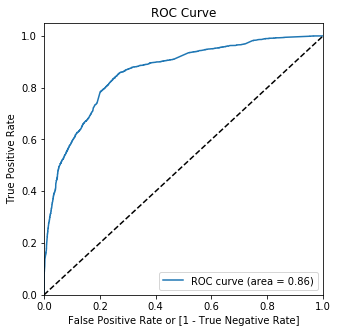

In [114]:
# ROC Curve
draw_roc(pred_df['Converted'], pred_df['Conversion_Probability'])

In [115]:
cutoffs = [float(x)/10 for x in range(10)]
for i in cutoffs:
    pred_df[i] = pred_df['Conversion_Probability'].map(lambda x: 1 if x>i else 0)
pred_df.head()

Converted  Conversion_Probability  Lead Score  Predicted_Converted  0.0  \
5509          1                0.872022       87.20                    1    1   
7746          0                0.208664       20.87                    0    1   
8263          0                0.103503       10.35                    0    1   
4559          1                0.732059       73.21                    1    1   
7959          1                0.691036       69.10                    1    1   

      0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  
5509    1    1    1    1    1    1    1    1    0  
7746    1    1    0    0    0    0    0    0    0  
8263    1    0    0    0    0    0    0    0    0  
4559    1    1    1    1    1    1    1    0    0  
7959    1    1    1    1    1    1    0    0    0

### Finding Probability Cut Off

In [116]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(pred_df.Converted, pred_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.386692  1.000000  0.000000
0.1   0.1  0.546356  0.969362  0.279650
0.2   0.2  0.730266  0.890274  0.629380
0.3   0.3  0.779859  0.854649  0.732704
0.4   0.4  0.790191  0.795511  0.786837
0.5   0.5  0.780411  0.641254  0.868149
0.6   0.6  0.777380  0.553260  0.918688
0.7   0.7  0.767874  0.478447  0.950359
0.8   0.8  0.732746  0.355540  0.970575
0.9   0.9  0.693071  0.224439  0.988544


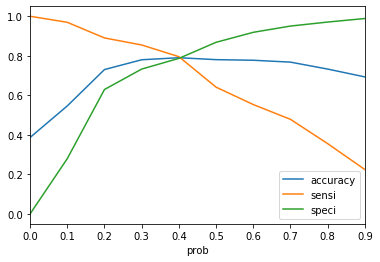

In [117]:
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])

- From the curve above, probability cutoff 0.4 is optimal

In [118]:
#re-predicting conversions
pred_df['Predicted_Converted'] = pred_df['Conversion_Probability'].apply(lambda x:1 if x>0.4 else 0)
pred_df.head(10)

Converted  Conversion_Probability  Lead Score  Predicted_Converted  0.0  \
5509          1                0.872022       87.20                    1    1   
7746          0                0.208664       20.87                    0    1   
8263          0                0.103503       10.35                    0    1   
4559          1                0.732059       73.21                    1    1   
7959          1                0.691036       69.10                    1    1   
7915          1                0.695931       69.59                    1    1   
6359          0                0.435503       43.55                    1    1   
2245          1                0.768824       76.88                    1    1   
6800          0                0.370423       37.04                    0    1   
5185          0                0.331650       33.17                    0    1   

      0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  
5509    1    1    1    1    1    1    1    1    0  
7746    1    1    0    0    0    0    0    0    0  
8263    1    0    0    0    0    0    0    0    0  
4559    1    1    1    1    1    1    1    0    0  
7959    1    1    1    1    1    1    0    0    0  
7915    1    1    1    1    1    1    0    0    0  
6359    1    1    1    1    0    0    0    0    0  
2245    1    1    1    1    1    1    1    0    0  
6800    1    1    1    0    0    0    0    0    0  
5185    1    1    1    0    0    0    0    0    0

In [119]:
#recomputing metrics

In [120]:
#confusion matrix
confusion_train = metrics.confusion_matrix(pred_df['Converted'], pred_df['Predicted_Converted'])
print(confusion_train)

[[3503  949]
 [ 574 2233]]


In [121]:
truePositivesTrain = confusion_train[1,1]
trueNegativesTrain = confusion_train[0,0]
falsePositivesTrain = confusion_train[0,1]
falseNegativesTrain = confusion_train[1,0]

In [122]:
#accuracy of the model on train data set at probability chosen above
metrics.accuracy_score(pred_df['Converted'], pred_df['Predicted_Converted'])

0.7901914864306379

In [123]:
#sensitivty/recall
sensitivity = truePositivesTrain / (truePositivesTrain+falseNegativesTrain)
sensitivity

0.7955112219451371

In [124]:
specificity = trueNegativesTrain / (trueNegativesTrain+falsePositivesTrain)
specificity

0.786837376460018

In [125]:
falsePositiveRateTrain = falsePositivesTrain / (falsePositivesTrain+trueNegativesTrain)
falsePositiveRateTrain

0.21316262353998203

In [126]:
#positive predictive value - precision
positivePredictiveValueTrain = truePositivesTrain / (truePositivesTrain+falsePositivesTrain)
positivePredictiveValueTrain

0.701759899434318

In [127]:
negativePredictiveValueTrain = trueNegativesTrain / (trueNegativesTrain+falseNegativesTrain)
negativePredictiveValueTrain

0.8592102035810645

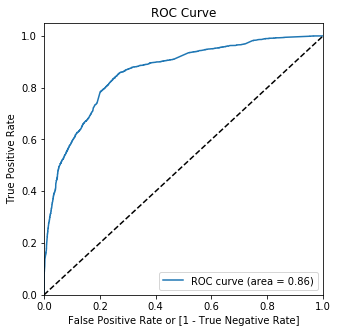

In [128]:
# ROC Curve
draw_roc(pred_df['Converted'], pred_df['Conversion_Probability'])

- While the optimal value of probability obtained from accuracy, specifity, sensitivity curve was 0.4, dropping cutoff probability to 0.4 resulted in false positivity increase, thereby decreasing the precision value, which in business sense would mean a drop in the 'Conversion Rate' which is the key metric as per the problem statement, therefore sticking to 0.5, and trying an even higher value, perhaps 0.55

In [129]:
#re-predicting conversions
pred_df['Predicted_Converted'] = pred_df['Conversion_Probability'].apply(lambda x:1 if x>0.55 else 0)
pred_df.head(10)

Converted  Conversion_Probability  Lead Score  Predicted_Converted  0.0  \
5509          1                0.872022       87.20                    1    1   
7746          0                0.208664       20.87                    0    1   
8263          0                0.103503       10.35                    0    1   
4559          1                0.732059       73.21                    1    1   
7959          1                0.691036       69.10                    1    1   
7915          1                0.695931       69.59                    1    1   
6359          0                0.435503       43.55                    0    1   
2245          1                0.768824       76.88                    1    1   
6800          0                0.370423       37.04                    0    1   
5185          0                0.331650       33.17                    0    1   

      0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  
5509    1    1    1    1    1    1    1    1    0  
7746    1    1    0    0    0    0    0    0    0  
8263    1    0    0    0    0    0    0    0    0  
4559    1    1    1    1    1    1    1    0    0  
7959    1    1    1    1    1    1    0    0    0  
7915    1    1    1    1    1    1    0    0    0  
6359    1    1    1    1    0    0    0    0    0  
2245    1    1    1    1    1    1    1    0    0  
6800    1    1    1    0    0    0    0    0    0  
5185    1    1    1    0    0    0    0    0    0

In [130]:
#confusion matrix
confusion_train = metrics.confusion_matrix(pred_df['Converted'], pred_df['Predicted_Converted'])
print(confusion_train)

[[4004  448]
 [1138 1669]]


In [131]:
truePositivesTrain = confusion_train[1,1]
trueNegativesTrain = confusion_train[0,0]
falsePositivesTrain = confusion_train[0,1]
falseNegativesTrain = confusion_train[1,0]

In [132]:
#positive predictive value - precision
positivePredictiveValueTrain = truePositivesTrain / (truePositivesTrain+falsePositivesTrain)
positivePredictiveValueTrain

0.788379782711384

It is observed that, the model gave high sensitivity when the probability cutoff is 0.6

In [133]:
#re-predicting conversions at 0.6
pred_df['Predicted_Converted'] = pred_df['Conversion_Probability'].apply(lambda x:1 if x>0.6 else 0)
pred_df.head(10)

Converted  Conversion_Probability  Lead Score  Predicted_Converted  0.0  \
5509          1                0.872022       87.20                    1    1   
7746          0                0.208664       20.87                    0    1   
8263          0                0.103503       10.35                    0    1   
4559          1                0.732059       73.21                    1    1   
7959          1                0.691036       69.10                    1    1   
7915          1                0.695931       69.59                    1    1   
6359          0                0.435503       43.55                    0    1   
2245          1                0.768824       76.88                    1    1   
6800          0                0.370423       37.04                    0    1   
5185          0                0.331650       33.17                    0    1   

      0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  
5509    1    1    1    1    1    1    1    1    0  
7746    1    1    0    0    0    0    0    0    0  
8263    1    0    0    0    0    0    0    0    0  
4559    1    1    1    1    1    1    1    0    0  
7959    1    1    1    1    1    1    0    0    0  
7915    1    1    1    1    1    1    0    0    0  
6359    1    1    1    1    0    0    0    0    0  
2245    1    1    1    1    1    1    1    0    0  
6800    1    1    1    0    0    0    0    0    0  
5185    1    1    1    0    0    0    0    0    0

In [134]:
#confusion matrix
confusion_train = metrics.confusion_matrix(pred_df['Converted'], pred_df['Predicted_Converted'])
print(confusion_train)

[[4090  362]
 [1254 1553]]


In [135]:
truePositivesTrain = confusion_train[1,1]
trueNegativesTrain = confusion_train[0,0]
falsePositivesTrain = confusion_train[0,1]
falseNegativesTrain = confusion_train[1,0]

In [136]:
#positive predictive value - precision
positivePredictiveValueTrain = truePositivesTrain / (truePositivesTrain+falsePositivesTrain)
positivePredictiveValueTrain

0.8109660574412533

In [137]:
#target precision rate obtained at 0.6, will use it as the cutoff, 
#a tradeoff on sensitivity done to obtain a better value of precision 

In [138]:
#scaling X_test
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
X_test.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
3374     0.023904                     0.027729              0.054545   
4262     0.000000                     0.000000              0.000000   
7855     0.011952                     0.036532              0.054545   
3017     0.015936                     0.516285              0.072727   
560      0.019920                     0.610475              0.030364   

      A free copy of Mastering The Interview  \
3374                                     0.0   
4262                                     0.0   
7855                                     0.0   
3017                                     0.0   
560                                      0.0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
3374                                    1                          0   
4262                                    0                          0   
7855                                    0                          0   
3017                                    1                          0   
560                                     0                          0   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  \
3374                        0                           1   
4262                        0                           0   
7855                        0                           0   
3017                        0                           0   
560                         0                           0   

      Lead Source_Facebook  Lead Source_Google  ...  \
3374                     0                   0  ...   
4262                     0                   0  ...   
7855                     0                   1  ...   
3017                     0                   1  ...   
560                      0                   0  ...   

      Last Notable Activity_Form Submitted on Website  \
3374                                                0   
4262                                                0   
7855                                                0   
3017                                                0   
560                                                 0   

      Last Notable Activity_Had a Phone Conversation  \
3374                                               0   
4262                                               0   
7855                                               0   
3017                                               0   
560                                                0   

      Last Notable Activity_Modified  \
3374                               0   
4262                               0   
7855                               1   
3017                               0   
560                                0   

      Last Notable Activity_Olark Chat Conversation  \
3374                                              0   
4262                                              0   
7855                                              0   
3017                                              0   
560                                               0   

      Last Notable Activity_Page Visited on Website  \
3374                                              0   
4262                                              0   
7855                                              0   
3017                                              0   
560                                               0   

      Last Notable Activity_Resubscribed to emails  \
3374                                             0   
4262                                             0   
7855                                             0   
3017                                             0   
560                                              0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
3374                               1                                  0   
4262                               0                                  0   
7855                

In [139]:
#predicting values and evaluating over test data set
y_test_pred = res.predict(sm.add_constant(X_test[cols]))
y_test_pred[:10]

3374    0.393834
4262    0.161347
7855    0.047495
3017    0.434399
560     0.901251
605     0.152487
5089    0.566252
6202    0.084964
4534    0.456946
6667    0.792410
dtype: float64

In [140]:
#comparing conversions and probabilities obtained
pred_df_test = pd.DataFrame({'Converted': y_test.values, 'Conversion_Probability': y_test_pred, 'Lead Score': round(y_test_pred*100, 2)})
pred_df_test['Predicted_Converted'] = pred_df_test['Conversion_Probability'].apply(lambda x:1 if x>0.6 else 0)
pred_df_test.head(10)

Converted  Conversion_Probability  Lead Score  Predicted_Converted
3374          0                0.393834       39.38                    0
4262          0                0.161347       16.13                    0
7855          0                0.047495        4.75                    0
3017          1                0.434399       43.44                    0
560           1                0.901251       90.13                    1
605           0                0.152487       15.25                    0
5089          1                0.566252       56.63                    0
6202          0                0.084964        8.50                    0
4534          0                0.456946       45.69                    0
6667          0                0.792410       79.24                    1

In [141]:
#confusion matrix on test data set
confusion_test = metrics.confusion_matrix(pred_df_test['Converted'], pred_df_test['Predicted_Converted'])
print(confusion_test)

[[1100   87]
 [ 270  358]]


In [142]:
#accuracy of the model on train data set at probability chosen above
metrics.accuracy_score(pred_df_test['Converted'], pred_df_test['Predicted_Converted'])

0.8033057851239669

In [143]:
truePositivesTest = confusion_test[1,1]
trueNegativesTest = confusion_test[0,0]
falsePositivesTest = confusion_test[0,1]
falseNegativesTest = confusion_test[1,0]

In [144]:
#sensitivty/recall
sensitivity = truePositivesTest / (truePositivesTest+falseNegativesTest)
sensitivity

0.5700636942675159

In [145]:
specificity = trueNegativesTest / (trueNegativesTest+falsePositivesTest)
specificity

0.9267059814658803

In [146]:
falsePositiveRateTest = falsePositivesTest / (falsePositivesTest+trueNegativesTest)
falsePositiveRateTest

0.07329401853411963

In [147]:
#positive prediictive value - precision
positivePredictiveValueTest = truePositivesTest / (truePositivesTest+falsePositivesTest)
positivePredictiveValueTest

0.8044943820224719

In [148]:
negativePredictiveValueTest = trueNegativesTest / (trueNegativesTest+falseNegativesTest)
negativePredictiveValueTest

0.8029197080291971

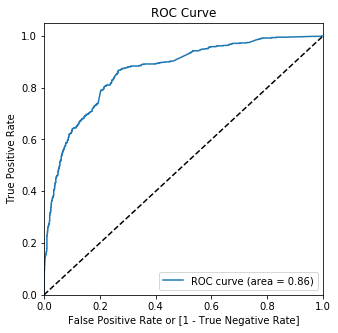

In [149]:
# ROC Curve
draw_roc(pred_df_test['Converted'], pred_df_test['Conversion_Probability'])

<br/>

# <font color = blue> Step 6: Results </font>

In [150]:
#coefficients for log odds, converting to odds 

np.exp(res.params)

const                                              2.917243
Total Time Spent on Website                       55.914361
Lead Origin_Landing Page Submission                0.199201
Lead Source_Reference                             21.882017
Lead Source_Welingak Website                     213.100449
Last Activity_Email Bounced                        0.086488
Last Activity_Had a Phone Conversation             7.195595
Last Activity_Olark Chat Conversation              0.387789
Specialization_Unknown                             0.245859
Last Notable Activity_Email Link Clicked           0.165537
Last Notable Activity_Email Opened                 0.268238
Last Notable Activity_Modified                     0.154770
Last Notable Activity_Olark Chat Conversation      0.165543
Last Notable Activity_Page Visited on Website      0.171532
Last Notable Activity_Unsubscribed                 0.141651
dtype: float64

In [151]:
#values greater than 1 indicate a positive relationship between conversion and the variable
#values less han 1 indicate a negative relationship

- Lead Score assigned to every lead as : Conversion Probability * 100
- Leads with calculated Lead Score greater than 60 (or Conversion Probability > 0.6) to be considered 'Hot Leads'
- The optimal value of probability considering accuracy, sensitivity, and specifity was obtained as 0.4
- However, at 0.4, the precision value or the conversion rate of 'hot leads' (which is the key metric) dropped considerably
- At probability>0.6, the target conversion rate of 80% was achieved on both training and target data-sets, with a little trade-off in sensitivity, but improving accuracy and precision
- Of all the leads reported as 'Hot Leads', about 80% are likely to convert
- The three most important metrics obtained from the model were : Time Spent on Website, Lead Source, and Last Activity
- Within the above 3 metrics, time spent, lead source as reference or welingak website, and phone conversation as last activity has a particularly high positive impact on lead conversion probability
- Users that unsubscribed, or users to whom sent emails bounced, were observed to be highly unlikely to convert.